In [6]:
import pandas as pd
from sklearn import neighbors
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Part 1

In [5]:
train_df_1 = pd.read_csv('RobotDataset/Robot1',delimiter=' ', header=None, names = ['class', 'a1', 'a2', 'a3', 'a4', 'a5','a6', 'id'])
train_df_2 = pd.read_csv('RobotDataset/Robot2',delimiter=' ', header=None, names = ['class', 'a1', 'a2', 'a3', 'a4', 'a5','a6', 'id'])
train_df_3 = pd.read_csv('Iris/Iris.csv', header=None, names = ['sl', 'sw', 'pl', 'pw', 'class'])

In [6]:
train_df_1 = train_df_1.drop('id', axis=1)
train_df_2 = train_df_2.drop('id', axis=1)
#train_df_3 = train_df_3.drop('id', axis=1)

In [7]:
# probs = np.random.rand(len(train_df_1))
# training_mask = probs <= 0.8
# validation_mask = probs > 0.8
# train_1 =  train_df_1[training_mask]
# val_1 = train_df_1[validation_mask]
X_train_1, Y_train_1 = train_df_1.drop(['class'], axis = 1), train_df_1['class']
# X_val_1, Y_val_1 = val_1.drop(['id', 'class'], axis=1), val_1['class']

In [8]:
# probs = np.random.rand(len(train_df_1))
# training_mask = probs <= 0.8
# validation_mask = probs > 0.8
# train_2 =  train_df_2[training_mask]
# val_2 = train_df_2[validation_mask]
X_train_2, Y_train_2 = train_df_2.drop(['class'], axis = 1), train_df_2['class']
# X_val_2, Y_val_2 = val_1.drop(['id', 'class'], axis=1), val_1['class']

In [9]:
# probs = np.random.rand(len(train_df_1))
# training_mask = probs <= 0.8
# validation_mask = probs > 0.8
# train_3 =  train_df_3[training_mask]
# val_3 = train_df_3[validation_mask]
X_train_3, Y_train_3 = train_df_3.drop('class', axis = 1), train_df_3['class']
# X_val_3, Y_val_3 = val_3.drop('class', axis=1), val_3['class']

In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric = 'euclidean')
clf.fit(X_train_1, Y_train_1)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
class  knearestneighbors:
    def __init__(self, k=1, metric='euclidean'):
        self.k = k
        self.metric = metric
    def fit(self, X_train, Y_train, X_val):
        #self.k = kwargs['k']
        #self.metric = kwargs['metric']
        ans = [0]*len(X_val)
        for i in range(len(X_val)):
            lst = []
            for j in range(len(X_train)):
                s = 0.0
                #print(X_val.iloc[i,:])
                #print(X_train.iloc[j,:])
                #print()
                if self.metric == 'euclidean':
                    s = np.sum(np.square(np.subtract(X_val.iloc[i,:], X_train.iloc[j,:])))
                elif self.metric == 'minkowski':
                    s = (np.sum((np.subtract(val.iloc[i,:], X_train.iloc[j,:]))**len(X_train.iloc[i])))**(1/(len(X_train.iloc[i])))
                #print(s)
                lst.append((s,Y_train.iloc[j]))
            lst = sorted(lst)
            #print(lst)
            trg = []
            for f in range(self.k):
               trg.append(lst[f][1])
            #print(i)
            #print(self.k)
            ans[i] = Counter(trg).most_common(1)[0][0]
            #print()
        return ans
    def predict(self, X_train, Y_train, X_val):
        ans = [0]*len(X_val)
        for i in range(len(X_val)):
            lst = []
            for j in range(len(X_train)):
                s = 0.0
                #print(X_val.iloc[i,:])
                #print(X_train.iloc[j,:])
                #print()
                if self.metric == 'euclidean':
                    s = np.sum(np.square(np.subtract(X_val.iloc[i,:], X_train.iloc[j,:])))
                elif self.metric == 'minkowski':
                    s = (np.sum((np.subtract(val.iloc[i,:], X_train.iloc[j,:]))**len(X_train.iloc[i])))**(1/(len(X_train.iloc[i])))
                #print(s)
                lst.append((s,Y_train.iloc[j]))
            lst = sorted(lst)
            trg = []
            for f in range(self.k):
                trg.append(lst[f][1])
            ans[i] = Counter(trg).most_common(1)[0][0]
            #print()
        return ans

In [12]:
def k_fold_cross_val(X_train,Y_train, clf, k_fold=10):
    kf = KFold(n_splits=k_fold, shuffle=True)
    accuracy = []
    recall = []
    precision = []
    f1 = []
    for train, test in kf.split(X_train):
        #print(test)
        #X_train, Y_train = train.drop('class', axis = 1), train['class']
        Xtrain, Xtest = X_train.iloc[train], X_train.iloc[test]
        Ytrain, Ytest = Y_train.iloc[train], Y_train.iloc[test]
        ans = clf.fit(Xtrain, Ytrain, Xtest)
        accuracy.append(accuracy_score(Ytest, ans))
        res = precision_recall_fscore_support(Ytest, ans, average='weighted')
        precision.append(res[0])
        recall.append(res[1])
        f1.append(res[2])
    return sum(accuracy)/len(accuracy), sum(precision)/len(precision), sum(recall)/len(recall), sum(f1)/len(f1), 

##### Question1:
Implement a KNN classifier for each of the datasets. Report precision, recall, f1
score and accuracy. Compare your result with in-built(scikit-learn) KNN function
to check correctness of your algorithm.

In [13]:
clf1_me = knearestneighbors(k=3, metric='euclidean')
#clf1_sk = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric = 'euclidean')

In [14]:
clf_sk = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='brute', metric = 'euclidean')
clf_sk.fit(X_train_1, Y_train_1)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
acc_me, pre_me, re_me, f1_me = k_fold_cross_val(X_train_1, Y_train_1, clf1_me)
acc_sk, pre_sk, re_sk, f1_sk = cross_val_score(clf, X_train_1, Y_train_1, cv=10, scoring='accuracy').mean(), cross_val_score(clf, X_train_1, Y_train_1, cv=10, scoring='precision_weighted').mean(), cross_val_score(clf, X_train_1, Y_train_1, cv=10, scoring='recall_weighted').mean(), cross_val_score(clf, X_train_1, Y_train_1, cv=10, scoring='f1_weighted').mean()

In [16]:
print("                         My Classifier                   Sklearn Classifier")
print("accuracy score:        {0}                {1}".format(acc_me, acc_sk))
print("precision score:       {0}                {1}".format(pre_me, pre_sk))
print("recall score:          {0}                {1}".format(re_me, re_sk))
print("f1 score:              {0}                {1}".format(f1_me, f1_sk))

                         My Classifier                   Sklearn Classifier
accuracy score:        0.7621794871794871                0.6392857142857142
precision score:       0.8260721916971916                0.6921338383838384
recall score:          0.7621794871794871                0.6392857142857142
f1 score:              0.7663619604796076                0.6100351480305041


In [17]:
acc_me, pre_me, re_me, f1_me = k_fold_cross_val(X_train_2, Y_train_2, clf1_me)
acc_sk, pre_sk, re_sk, f1_sk = cross_val_score(clf, X_train_2, Y_train_2, cv=10, scoring='accuracy').mean(), cross_val_score(clf, X_train_2, Y_train_2, cv=10, scoring='precision_weighted').mean(), cross_val_score(clf, X_train_2, Y_train_2, cv=10, scoring='recall_weighted').mean(), cross_val_score(clf, X_train_2, Y_train_2, cv=10, scoring='f1_weighted').mean()

In [18]:
print("                         My Classifier                   Sklearn Classifier")
print("accuracy score:        {0}                {1}".format(acc_me, acc_sk))
print("precision score:       {0}                {1}".format(pre_me, pre_sk))
print("recall score:          {0}                {1}".format(re_me, re_sk))
print("f1 score:              {0}                {1}".format(f1_me, f1_sk))

                         My Classifier                   Sklearn Classifier
accuracy score:        0.8358974358974359                0.8461538461538461
precision score:       0.8813746438746438                0.8790842490842492
recall score:          0.8358974358974359                0.8461538461538461
f1 score:              0.8301174846395434                0.8407725607725608


In [19]:
acc_me, pre_me, re_me, f1_me = k_fold_cross_val(X_train_3, Y_train_3, clf1_me)
acc_sk, pre_sk, re_sk, f1_sk = cross_val_score(clf, X_train_3, Y_train_3, cv=10, scoring='accuracy').mean(), cross_val_score(clf, X_train_3, Y_train_3, cv=10, scoring='precision_weighted').mean(), cross_val_score(clf, X_train_3, Y_train_3, cv=10, scoring='recall_weighted').mean(), cross_val_score(clf, X_train_3, Y_train_3, cv=10, scoring='f1_weighted').mean()

In [20]:
print("                         My Classifier                   Sklearn Classifier")
print("accuracy score:        {0}                {1}".format(acc_me, acc_sk))
print("precision score:       {0}                {1}".format(pre_me, pre_sk))
print("recall score:          {0}                {1}".format(re_me, re_sk))
print("f1 score:              {0}                {1}".format(f1_me, f1_sk))

                         My Classifier                   Sklearn Classifier
accuracy score:        0.9637362637362639                0.9566666666666667
precision score:       0.9666742979242979                0.9676190476190476
recall score:          0.9637362637362639                0.9566666666666667
f1 score:              0.9622542163718635                0.9552910052910054


In [21]:
#clf1_me.predict(X_train_1, Y_train_1, X_test_1)

#### Question 2:
Use different distance measures as applicable. Plot graph to report accuracy with
change in value of K. Also suggest possible reason for better performance.

In [22]:
acc_lst = []
for i in range(1,30,2):
    clf = knearestneighbors(k=i, metric='euclidean')
    acc_lst.append((i,k_fold_cross_val(X_train_1, Y_train_1, clf)[0]))

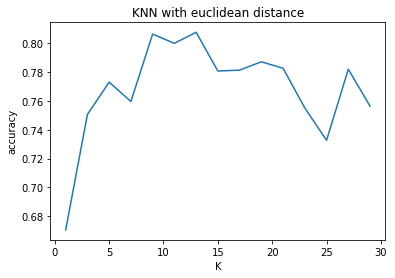

In [23]:
X_lst = []
Y_lst = []
for i in range(0,len(acc_lst)):
    X_lst.append(acc_lst[i][0])
    Y_lst.append(acc_lst[i][1])
#print(X_lst)
#print(Y_lst)
plt.plot(X_lst,Y_lst)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title('KNN with euclidean distance')
plt.show()

In [24]:
acc_lst = []
for i in range(1,30,2):
    clf = knearestneighbors(k=i, metric='minkowski')
    acc_lst.append((i,k_fold_cross_val(X_train_1, Y_train_1, clf1_me)[0]))

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


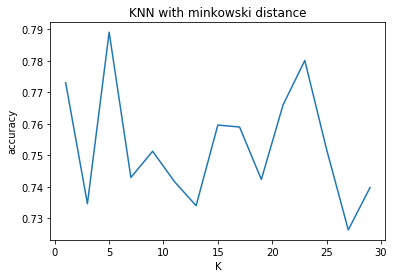

In [25]:
X_lst = []
Y_lst = []
for i in range(0,len(acc_lst)):
    X_lst.append(acc_lst[i][0])
    Y_lst.append(acc_lst[i][1])
#print(X_lst)
#print(Y_lst)
plt.plot(X_lst,Y_lst)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title('KNN with minkowski distance')
plt.show()

In [26]:
acc_lst = []
for i in range(1,30,2):
    clf = knearestneighbors(k=i, metric='euclidean')
    acc_lst.append((i,k_fold_cross_val(X_train_2, Y_train_2, clf)[0]))

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


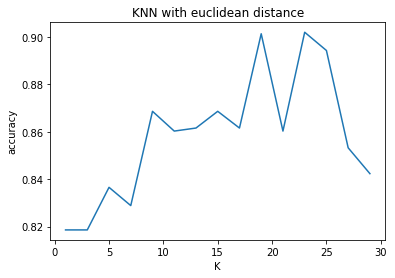

In [27]:
X_lst = []
Y_lst = []
for i in range(0,len(acc_lst)):
    X_lst.append(acc_lst[i][0])
    Y_lst.append(acc_lst[i][1])
#print(X_lst)
#print(Y_lst)
plt.plot(X_lst,Y_lst)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title('KNN with euclidean distance')
plt.show()

In [28]:
acc_lst = []
for i in range(1,30,2):
    clf = knearestneighbors(k=i, metric='euclidean')
    acc_lst.append((i,k_fold_cross_val(X_train_2, Y_train_2, clf1_me)[0]))

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


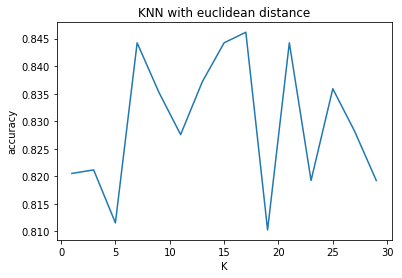

In [29]:
X_lst = []
Y_lst = []
for i in range(0,len(acc_lst)):
    X_lst.append(acc_lst[i][0])
    Y_lst.append(acc_lst[i][1])
#print(X_lst)
#print(Y_lst)
plt.plot(X_lst,Y_lst)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title('KNN with euclidean distance')
plt.show()

In [30]:
acc_lst = []
for i in range(1,30,2):
    clf = knearestneighbors(k=i, metric='minkowski')
    acc_lst.append((i,k_fold_cross_val(X_train_3, Y_train_3, clf1_me)[0]))

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


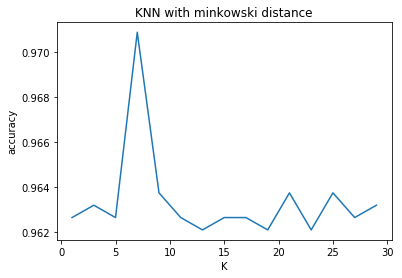

In [31]:
X_lst = []
Y_lst = []
for i in range(0,len(acc_lst)):
    X_lst.append(acc_lst[i][0])
    Y_lst.append(acc_lst[i][1])
#print(X_lst)
#print(Y_lst)
plt.plot(X_lst,Y_lst)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.title('KNN with minkowski distance')
plt.show()

# Part 2:
A bank is implementing a system to identify potential customers who have
higher probablity of availing loans to increase its profit. Implement Naive Bayes classifier
on this dataset to help bank achieve its goal. Report your observations and accuracy
of the model.

In [41]:
train_df = pd.read_csv('LoanDataset/data.csv', header=None, names = ['id', 'age', 'experience','income', 'zip', 'family size', 'monthly spend', 'education', 'mortage', 'accepted loan', 'security account', 'certificate of deposit', 'internet banking', 'credit card' ])

In [42]:
mp = {x:i for x,i in zip(train_df['zip'].unique().tolist(),range(len(train_df['zip'].unique().tolist())))}

In [43]:
train_df['zip'] = train_df['zip'].map(mp)

In [44]:
train_df = train_df.drop('id', axis=1)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('accepted loan', axis=1),train_df['accepted loan'], test_size=0.2,shuffle=True)

In [46]:
discrete = ['education', 'family size', 'security account', 'certificate of deposit', 'internet banking', 'credit card', 'zip']
continuous = ['age', 'experience', 'income', 'mortage']

In [47]:
class NaiveBayesClassifier:
    def __init__(self):
        self.mean_X_C_Y = 0
        self.mean_X_C_N = 0
        self.var_X_C_Y = 0
        self.var_X_C_N = 0
        self.priors = 0
        self.prob_Y = []
        self.prob_N = []
        self.discrete_map = {}
        self.l_X_train_Y = 0
        self.l_X_train_N = 0
        self.l_X_train = 0
        self.discrete = []
        self.continuous = []
    def fit(self, X_train, Y_train, discrete, continuous):
        self.discrete = discrete
        self.continuous = continuous
        self.mean_X_C_Y = X_train[continuous][Y_train==1].mean()
        self.mean_X_C_N = X_train[continuous][Y_train==0].mean()
        self.var_X_C_Y = X_train[continuous][Y_train==1].var()
        self.var_X_C_N = X_train[continuous][Y_train==0].var()
        self.priors = [Counter(Y_train).most_common()[0][1]/len(Y_train),Counter(Y_train).most_common()[1][1]/len(Y_train)]
        X_train_Y = X_train[Y_train == 1]
        X_train_N = X_train[Y_train == 0]
        self.l_X_train_Y = len(X_train_Y)
        self.l_X_train_N = len(X_train_N)
        self.l_X_train = len(X_train)
        for x in discrete:
            self.prob_Y.append(Counter(X_train_Y[x]))
            self.prob_N.append(Counter(X_train_N[x]))
        for i in range(len(self.prob_Y)):
            for key in self.prob_Y[i]:
                self.prob_Y[i][key]/=len(X_train_Y)
        for i in range(len(self.prob_N)):
            for key in self.prob_N[i]:
                self.prob_N[i][key]/=len(X_train_N)
        self.discrete_map = {x:i for x,i in zip(discrete, range(len(discrete)))}
    def likelihood(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp((-(X - mean) ** 2) / (2 * variance))
    def predict(self, X_test):
        ans = []
        X_ts = X_test[self.discrete].to_dict('records')
        for i in range(len(X_test)):
            yn = (self.l_X_train_N/self.l_X_train) * np.prod([self.prob_N[self.discrete_map[key]][X_ts[i][key]] for key in X_ts[i]]) * np.prod(self.likelihood(X_test[self.continuous].iloc[i], self.mean_X_C_N, self.var_X_C_N))
            yy = (self.l_X_train_Y/self.l_X_train) * np.prod([self.prob_Y[self.discrete_map[key]][X_ts[i][key]] for key in X_ts[i]]) * np.prod(self.likelihood(X_test[self.continuous].iloc[i], self.mean_X_C_Y, self.var_X_C_Y))
            a = 0 if yn>yy else 1
            ans.append(a)
        return ans

In [48]:
clf = NaiveBayesClassifier()

In [49]:
clf.fit(X_train, Y_train, discrete, continuous)

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
acc_me = accuracy_score(clf.predict(X_test), Y_test)
res = precision_recall_fscore_support(clf.predict(X_test), Y_test, average = 'binary')
pre_me, re_me, f1_me = res[0], res[1], res[2]

In [52]:
acc_sk = accuracy_score(gnb.predict(X_test), Y_test)
res = precision_recall_fscore_support(gnb.predict(X_test), Y_test, average = 'binary')
pre_sk, re_sk, f1_sk = res[0], res[1], res[2]

In [53]:
print("                         My Classifier                   Sklearn Classifier")
print("accuracy score:        {0}                {1}".format(acc_me, acc_sk))
print("precision score:       {0}                {1}".format(pre_me, pre_sk))
print("recall score:          {0}                {1}".format(re_me, re_sk))
print("f1 score:              {0}                {1}".format(f1_me, f1_sk))

                         My Classifier                   Sklearn Classifier
accuracy score:        0.89                0.8811111111111111
precision score:       0.36633663366336633                0.594059405940594
recall score:          0.5138888888888888                0.47619047619047616
f1 score:              0.42774566473988435                0.5286343612334802


## Part 3:
We are given a dataset containing various criteria important to get admissions into Master’s program and probablity of getting an admit

In [87]:
train_df = pd.read_csv('AdmissionDataset/data.csv')

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop(['Serial No.','Chance of Admit '], axis=1),train_df['Chance of Admit '], test_size=0.2,shuffle=True)

In [56]:
class linear_regression:
    def __init__(self, alpha=0.1, iteration=1000, loss_func = "MSE"):
        self.alpha = alpha 
        self.iterations = iteration
        self.loss_func = loss_func
        self.mean = 0
        self.std = 0
        self.m = 0
        self.theta = []
    def fit(self,x_tr, y_tr):
        self.m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        theta = np.random.rand(len(x_tr.iloc[0])+1)
        past_costs = []
        past_thetas = [theta]
        x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
        for i in range(self.iterations):
            prediction = np.dot(x, theta.T)
            #print(len(prediction) == len(x_tr))
            error = prediction - y_tr
            #print(error)
            if self.loss_func == 'MSE':
                cost = 1/(2*self.m) * np.dot(error.T, error)
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/self.m) * np.dot(x.T, error))
            elif self.loss_func == 'MAE':
                    cost = 1/(self.m)*np.sum(np.abs(error))
                    past_costs.append(cost)
                    theta = theta - (self.alpha * (1/self.m) *( np.dot(x.T, error/np.abs(error))))
            elif self.loss_func == 'MAPE':
                cost = 1/(self.m)*np.sum(np.abs(error)/y_tr)
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/self.m) *( np.dot(x.T, error/(y_tr*np.abs(error)))))
            past_thetas.append(theta)
            self.theta = past_thetas[-1]
        return past_thetas, past_costs
    def predict(self, x_val):
        x_val = (x_val - self.mean)/self.std
        x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
        return np.dot(x, self.theta.T)
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]
    def mean_abs_error(self, y_pred, y_true):
        return (1/len(y_pred))*np.sum(np.abs((y_pred-y_true)))
    def mean_square_error(self, y_pred, y_true):
        return (1/(2*len(y_pred)))*np.sum(np.square((y_pred-y_true)))
    def mean_abs_per_error(self, y_pred, y_true):
        return (1/len(y_pred))*np.sum(np.abs((y_pred-y_true)/y_true))

In [57]:
clf = linear_regression(loss_func='MSE')

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [59]:
past_thetas, past_costs = clf.fit(X_train, Y_train)
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

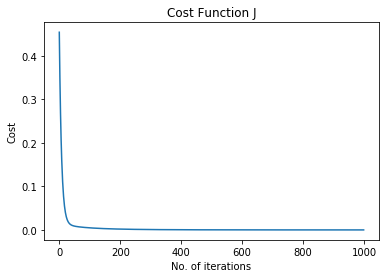

In [60]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [61]:
Y_pred_me = clf.predict(X_val)
Y_pred_sk = reg.predict(X_val)

In [62]:
from sklearn.metrics import r2_score
r2_me = r2_score(Y_pred_me, Y_val)
r2_sk = r2_score(Y_pred_sk, Y_val)
print("                         My Classifier                   Sklearn Classifier")
print("r2 score:               {0}                {1}".format(r2_me, r2_sk))

                         My Classifier                   Sklearn Classifier
r2 score:               0.7973004408221168                0.8033691727995181


In [63]:
#y_test = clf.predict(X_test)

##### Question 2:
Compare the performance of Mean square error loss function vs Mean Absolute
error function vs Mean absolute percentage error function and explain the reasons
for the observed behaviour.

In [64]:
clf1 = linear_regression(loss_func='MSE')
clf2 = linear_regression(loss_func='MAE')
clf3 = linear_regression(loss_func='MAPE')
_,_ = clf1.fit(X_train, Y_train)
_,_ = clf2.fit(X_train, Y_train)
_,_ = clf3.fit(X_train, Y_train)
Y_pred_me1 = clf1.predict(X_val)
Y_pred_me2 = clf2.predict(X_val)
Y_pred_me3 = clf3.predict(X_val)
mse_error = clf1.mean_square_error(Y_pred_me1, Y_val)
mae_error = clf2.mean_abs_error(Y_pred_me2, Y_val)
mape_error = clf3.mean_abs_per_error(Y_pred_me3, Y_val)
print("Mean Square error:                {0}".format(mse_error))
print("Mean absolute error:              {0}".format(mae_error))
print("Mean absolute percentage error:   {0}".format(mape_error))
print("                         MSE Classifier                   MAE Classifier                MAPE Classifier")
print("r2 score:               {0}                {1}           {2}".format(r2_score(Y_pred_me1, Y_val), r2_score(Y_pred_me2, Y_val),r2_score(Y_pred_me3, Y_val)))

Mean Square error:                0.0021216921856713495
Mean absolute error:              0.04194920936340298
Mean absolute percentage error:   0.06748253757867793
                         MSE Classifier                   MAE Classifier                MAPE Classifier
r2 score:               0.7821083171571894                0.7987575151142902           0.8134605211284875


##### Question 3:
Analyse and report the behaviour of the coefficients(for example: sign of coefficients, value of coefficients etc.) and support it with appropriate plots as neces-
sary


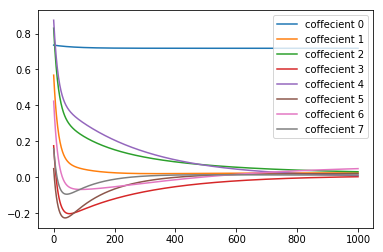

In [65]:
past_thtas = np.asarray(past_thetas).T
for i in range(len(X_train.iloc[0])+1):
    plt.plot(past_thtas[i,:], label = 'coffecient '+str(i))
plt.legend()
plt.show()
#past_thtas.shape

## Part 4:
Use the Admission dataset as in the third question for logistic regression.

#### Question 1:
Implement logistic regression model to predict if the student will get admit

In [104]:
train_df = pd.read_csv('AdmissionDataset/data.csv')

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop(['Serial No.','Chance of Admit '], axis=1),train_df['Chance of Admit '], test_size=0.2,shuffle=True)

In [106]:
class logistic_regression:
    def __init__(self, alpha=0.1, iteration=1000, threshold = 0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        theta = np.random.rand(len(x_tr.iloc[0])+1)
        past_costs = []
        past_thetas = [theta]
        x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
        for i in range(self.iterations):
            prediction = self.sigmoid(np.dot(x, theta.T))
            #prediction[prediction>=0.5] = 1
            #prediction[prediction<0.5] = 0
            #print(len(prediction) == len(x_tr))
            error = prediction - y_tr
            #print(error)
            cost = - 1/(m) * (np.dot(y_tr.T, error) + np.dot(1-y_tr,1-error))
            past_costs.append(cost)
            theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
            past_thetas.append(theta)
            self.theta = past_thetas[-1]
        return past_thetas, past_costs
    def predict(self, x_val):
        x_val = (x_val - self.mean)/self.std
        x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
        prediction = self.sigmoid(np.dot(x, self.theta.T))
        prediction[prediction>=self.threshold] = 1
        prediction[prediction<self.threshold] = 0
        return prediction
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [107]:
Y_train[Y_train>=0.5] = 1
Y_train[Y_train<0.5] = 0
Y_val[Y_val>=0.5] = 1
Y_val[Y_val<0.5] = 0

In [108]:
from sklearn.linear_model import LogisticRegression
clf_me = logistic_regression()
clf_sk = LogisticRegression()

In [109]:
past_thetas, past_costs = clf_me.fit(X_train, Y_train)
clf_sk.fit(X_train, Y_train)

/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

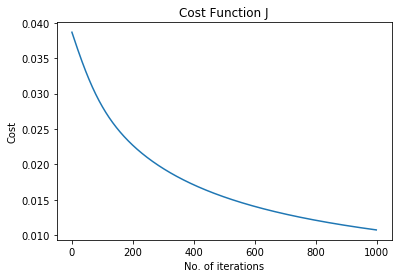

In [110]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [111]:
Y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(Y_pred_me, Y_val)
res = precision_recall_fscore_support(Y_pred_me, Y_val, average = 'binary')
pre_me, re_me, f1_me = res[0], res[1], res[2]
Y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(Y_pred_sk, Y_val)
res = precision_recall_fscore_support(Y_pred_sk, Y_val, average = 'binary')
pre_sk, re_sk, f1_sk = res[0], res[1], res[2]

In [112]:
print("                         My Classifier                   Sklearn Classifier")
print("accuracy score:        {0}                {1}".format(acc_me, acc_sk))
print("precision score:       {0}                {1}".format(pre_me, pre_sk))
print("recall score:          {0}                {1}".format(re_me, re_sk))
print("f1 score:              {0}                {1}".format(f1_me, f1_sk))

                         My Classifier                   Sklearn Classifier
accuracy score:        0.9111111111111111                0.9111111111111111
precision score:       1.0                0.9876543209876543
recall score:          0.9101123595505618                0.9195402298850575
f1 score:              0.9529411764705883                0.9523809523809523


#### Question 2:
Compare the performances of logistic regression model with KNN model on the
Admission dataset

In [113]:
clf_lg = logistic_regression()
clf_knn = knearestneighbors()

In [114]:
acc_knn, pre_knn, re_knn, f1_knn = k_fold_cross_val(X_train, Y_train, clf_knn)
clf_lg.fit(X_train, Y_train)
Y_pred_lg = clf_lg.predict(X_val)
acc_lg = accuracy_score(Y_pred_lg, Y_val)
res = precision_recall_fscore_support(Y_pred_lg, Y_val, average = 'binary')
pre_lg, re_lg, f1_lg = res[0], res[1], res[2]

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [115]:
print("                     logistic regression Classifier      KNN Classifier")
print("accuracy score:        {0}                {1}".format(acc_lg, acc_knn))
print("precision score:       {0}                {1}".format(pre_lg, pre_knn))
print("recall score:          {0}                {1}".format(re_lg, re_knn))
print("f1 score:              {0}                {1}".format(f1_lg, f1_knn))

                     logistic regression Classifier      KNN Classifier
accuracy score:        0.9                0.9194444444444445
precision score:       1.0                0.9281434884559886
recall score:          0.9                0.9194444444444445
f1 score:              0.9473684210526316                0.9177305696349325


#### Question 3:
Plot a graph explaining the co-relation between threshold value vs precision and
recall. Report the criteria one should use while deciding the threshold value. Explain the reason behind your choice of threshold in your model

In [116]:
acc = []
pre = []
rec = []
f1 = []
for i in  np.linspace(0,1,11):
    clf_lg = logistic_regression(threshold = i)
    clf_lg.fit(X_train, Y_train)
    Y_pred_lg = clf_lg.predict(X_val)
    acc_lg = accuracy_score(Y_pred_lg, Y_val)
    res = precision_recall_fscore_support(Y_pred_lg, Y_val, average = 'binary')
    pre_lg, re_lg, f1_lg = res[0], res[1], res[2]
    #print(i, acc_lg, pre_lg, re_lg, f1_lg)
    acc.append((i,acc_lg))
    pre.append((i,pre_lg))
    rec.append((i,re_lg))
    f1.append((i,f1_lg))

/home/neil/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


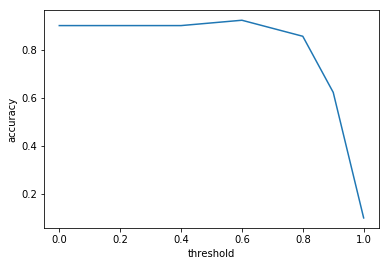

In [117]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(acc[i][0])
    Y_lst.append(acc[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

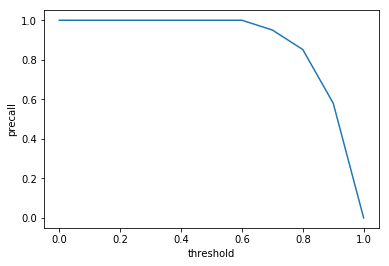

In [118]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(pre[i][0])
    Y_lst.append(pre[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('precall')
plt.show()

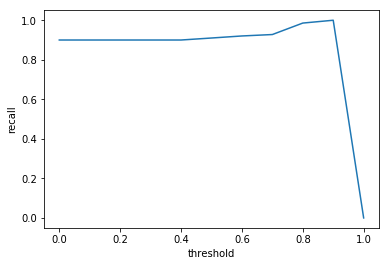

In [119]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(rec[i][0])
    Y_lst.append(rec[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('recall')
plt.show()

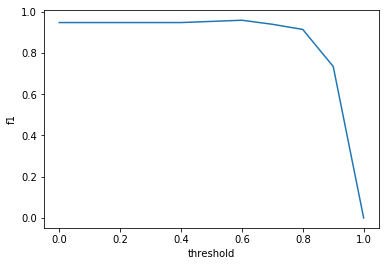

In [120]:
X_lst = []
Y_lst = []
for i in range(len(acc)):
    X_lst.append(f1[i][0])
    Y_lst.append(f1[i][1])
plt.plot(X_lst,Y_lst)
plt.xlabel('threshold')
plt.ylabel('f1')
plt.show()

## Part 5:
Implement logistic regression using One vs All and One vs One approaches.
Use the following dataset http://preon.iiit.ac.in/~sanjoy_chowdhury/wine-quality.
zip for completing the task. Report your observations and accuracy of the model.

In [14]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [16]:
class logistic_regressionOVA:
    def __init__(self, alpha=0.1, iteration=1000, classes=2, threshold=0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
        self.theta_c = []
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        for c in range(self.classes+1):
            y_tr_c = (y_tr==c).astype(int)
            theta = np.random.rand(len(x_tr.iloc[0])+1)
            past_costs = []
            past_thetas = [theta]
            x = np.c_[np.ones(len(x_tr.iloc[:,0])),x_tr]
            for i in range(self.iterations):
                prediction = self.sigmoid(np.dot(x, theta.T))
                #prediction[prediction>=0.5] = 1
                #prediction[prediction<0.5] = 0
                #print(len(prediction) == len(x_tr))
                error = prediction - y_tr_c
                #print(error)
                cost = - 1/(m) * (np.dot(y_tr.T, error) + np.dot(1-y_tr,1-error))
                past_costs.append(cost)
                theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                past_thetas.append(theta)
            self.theta_c.append(theta)
        #print(self.theta_c)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        x_val = (x_val - self.mean)/self.std
        #print(self.theta_c)
        for c in range(self.classes+1):
            x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
            #print(self.theta_c[c])
            #print()
            prediction = self.sigmoid(np.dot(x, self.theta_c[c].T))
            #print(prediction.shape)
            ans.append(prediction)
            #print(prediction.shape)
        ans = np.array(ans).T
        #print(ans)
        return np.argmax(ans,axis=1)
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [17]:
clf_me = logistic_regressionOVA(classes = 10)

In [18]:
_,_ = clf_me.fit(X_train,Y_train)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf_sk = OneVsRestClassifier(LogisticRegression(random_state=0, solver = 'lbfgs', max_iter=1000)).fit(X_train, Y_train)

In [20]:
y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(y_pred_me,Y_val)

In [21]:
y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(y_pred_sk,Y_val)

In [22]:
print("                            My One vs All Classifier         Sklearn One vs All Classifier")
print("accuracy score:               {0}                {1}".format(acc_me, acc_sk))

                            My One vs All Classifier         Sklearn One vs All Classifier
accuracy score:               0.5079365079365079                0.5226757369614512


In [41]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [43]:
# One Vs One with all classes available in dataset i.e. 3,4,5,6,7,8,9
class logistic_regressionOVO:
    def __init__(self, alpha=0.1, iteration=1000, classes=2, threshold=0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
        self.theta_c = {}
        self.mp = {}
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        for i,x in zip(range(len(y_tr.unique().tolist())),y_tr.unique().tolist()):
            self.mp[i]=x
        self.classes = len(y_tr.unique().tolist())
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                #print([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])
                x_tr_c = x_tr[list(x_tr.columns.values)][y_tr.isin([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])]
                y_tr_c12 = y_tr[:][y_tr.isin([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])]
                y_tr_c = (y_tr_c12==y_tr.unique().tolist()[c1]).astype(int)
                #print(y_tr_c)
                theta = np.random.rand(len(x_tr.iloc[0])+1)
                past_costs = []
                past_thetas = [theta]
                x = np.c_[np.ones(len(x_tr_c.iloc[:,0])),x_tr_c]
                if len(x_tr_c)>0:
                    for i in range(self.iterations):
                        prediction = self.sigmoid(-np.dot(x, theta.T))
                        #prediction[prediction>=0.5] = 1
                        #prediction[prediction<0.5] = 0
                        #print(len(prediction) == len(x_tr))
                        error = prediction - y_tr_c
                        #print(error)
                        cost = -1/(m) * (np.dot(y_tr_c.T, error) + np.dot(1-y_tr_c,1-error))
                        past_costs.append(cost)
                        theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                        past_thetas.append(theta)
                self.theta_c[(c1,c2)] = theta
        #print(self.theta_c)
        #print()
        #print(self.mp)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        #print(self.theta_c)
        x_val = (x_val - self.mean)/self.std
        for c1 in range(self.classes):
            for c2 in range(c1+1,self.classes):
                x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
                #print(self.theta_c[(c1,c2)])
                #print()
                prediction = np.dot(x, self.theta_c[(c1,c2)].T)
                #print(prediction.shape)
                #ans.append(prediction)
                #print(prediction.shape)
                prediction[prediction>=self.threshold] = self.mp[c1]
                prediction[prediction<self.threshold] = self.mp[c2]
                #print(prediction)
                ans.append(prediction)
                #print(ans)
        ans = np.array(ans).T
        pred = []
        for i in range(len(ans)):
            pred.append(Counter(ans[i]).most_common(1)[0][0])
        return pred
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [44]:
clf_me = logistic_regressionOVO(classes = 10)

In [45]:
_,_ = clf_me.fit(X_train,Y_train)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
clf_sk = OneVsOneClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)).fit(X_train, Y_train)

/home/neil/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [47]:
y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(y_pred_me,Y_val)

In [48]:
y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(y_pred_sk,Y_val)

In [49]:
print("                            My One vs One Classifier         Sklearn One vs One Classifier")
print("accuracy score:               {0}                {1}".format(acc_me, acc_sk))

                            My One vs One Classifier         Sklearn One vs One Classifier
accuracy score:               0.25396825396825395                0.5634920634920635


In [50]:
train_df = pd.read_csv('wine-quality/data.csv', delimiter=';')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop('quality', axis=1),train_df['quality'], test_size=0.2,shuffle=True)

In [ ]:
# One Vs One with all possible classes 0-10
class logistic_regressionOVO:
    def __init__(self, alpha=0.1, iteration=1000, classes=2, threshold=0.5):
        self.alpha = alpha 
        self.iterations = iteration
        self.classes = classes
        self.mean = 0
        self.std = 0
        self.theta = []
        self.threshold = threshold
        self.theta_c = {}
        self.mp = {}
    def fit(self,x_tr, y_tr):
        m = x_tr.size
        self.mean = x_tr.mean()
        self.std = x_tr.std()
        x_tr = (x_tr - self.mean)/self.std
        for i,x in zip(range(len(y_tr.unique().tolist())),y_tr.unique().tolist()):
            self.mp[i]=x
        #self.classes = len(y_tr.unique().tolist())
        for c1 in range(1,self.classes+1):
            for c2 in range(c1+1,self.classes+1):
                #print([y_tr.unique().tolist()[c1],y_tr.unique().tolist()[c2]])
                x_tr_c = x_tr[list(x_tr.columns.values)][y_tr.isin([c1,c2])]
                y_tr_c12 = y_tr[:][y_tr.isin([c1,c2])]
                y_tr_c = (y_tr_c12==c1).astype(int)
                #print(y_tr_c)
                theta = np.random.rand(len(x_tr.iloc[0])+1)
                past_costs = []
                past_thetas = [theta]
                x = np.c_[np.ones(len(x_tr_c.iloc[:,0])),x_tr_c]
                if len(x_tr_c)>0:
                    for i in range(self.iterations):
                        prediction = self.sigmoid(-np.dot(x, theta.T))
                        #prediction[prediction>=0.5] = 1
                        #prediction[prediction<0.5] = 0
                        #print(len(prediction) == len(x_tr))
                        error = prediction - y_tr_c
                        #print(error)
                        cost = - 1/(m) * (np.dot(y_tr_c.T, error) + np.dot(1-y_tr_c,1-error))
                        past_costs.append(cost)
                        theta = theta - (self.alpha * (1/m) * np.dot(x.T, error))
                        past_thetas.append(theta)
                self.theta_c[(c1,c2)] = theta
        #print(self.theta_c)
        #print()
        #print(self.mp)
        return past_thetas, past_costs
    def predict(self, x_val):
        ans = []
        #print(self.theta_c)
        x_val = (x_val - self.mean)/self.std
        for c1 in range(1,self.classes+1):
            for c2 in range(c1+1,self.classes+1):
                x = np.c_[np.ones(len(x_val.iloc[:,0])),x_val]
                #print(self.theta_c[(c1,c2)])
                #print()
                prediction = np.dot(x, self.theta_c[(c1,c2)].T)
                #print(prediction.shape)
                #ans.append(prediction)
                #print(prediction.shape)
                prediction[prediction>=self.threshold] = c1
                prediction[prediction<self.threshold] = c2
                #print(prediction)
                ans.append(prediction)
                #print(ans)
        ans = np.array(ans).T
        pred = []
        for i in range(len(ans)):
            pred.append(Counter(ans[i]).most_common(1)[0][0])
        #print(pred)
        return pred
    def sigmoid(self,x):
        return (np.exp(x)/(1+np.exp(x)))
    #past_thetas, past_costs = gradient_descent(X_train_4, Y_train_4, theta, iterations, alpha)
    #theta = past_thetas[-1]

In [ ]:
clf_me = logistic_regressionOVO(classes = 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
clf_sk = OneVsOneClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)).fit(X_train, Y_train)

In [ ]:
_,_ = clf_me.fit(X_train,Y_train)

In [ ]:
y_pred_me = clf_me.predict(X_val)
acc_me = accuracy_score(y_pred_me,Y_val)

In [ ]:
y_pred_sk = clf_sk.predict(X_val)
acc_sk = accuracy_score(y_pred_sk,Y_val)

In [ ]:
print("                            My One vs One Classifier         Sklearn One vs One Classifier")
print("accuracy score:               {0}                {1}".format(acc_me, acc_sk))